In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [90]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Standardize the data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [91]:
# Calculate WCSS for different values of K (1 to 10)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


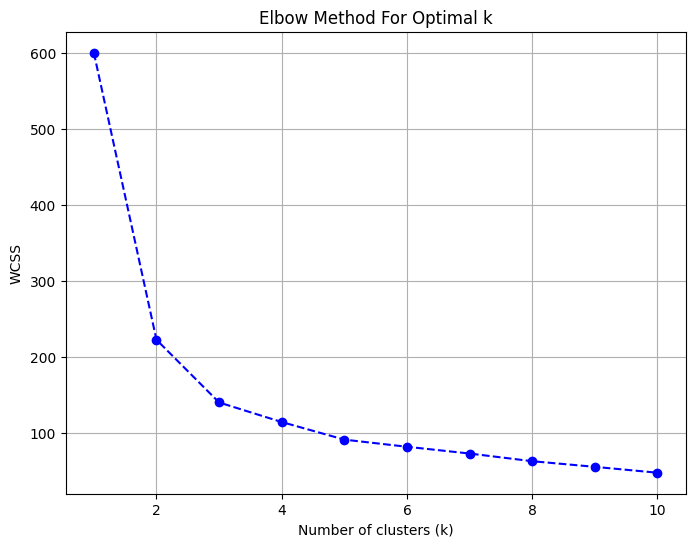

In [92]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [93]:
# Train KMeans with the optimal k value (let's assume 3 from the elbow curve)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


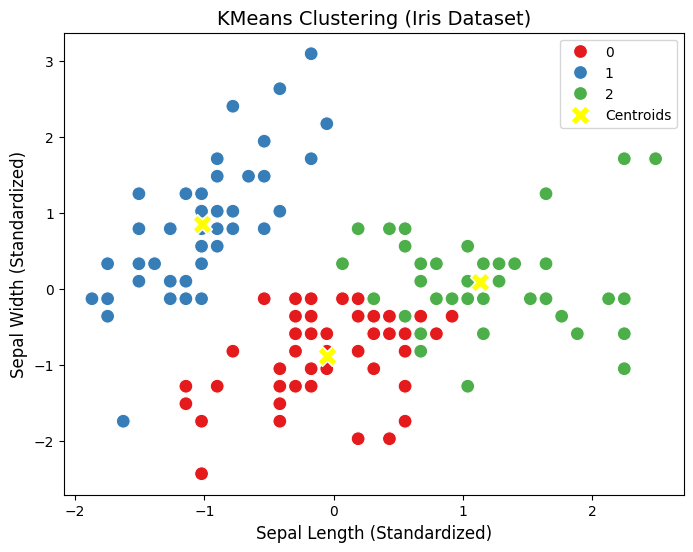

In [94]:
# Convert the dataset into a DataFrame for easier plotting with Seaborn
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['Cluster'] = y_kmeans

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the scatter plot with Seaborn
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', palette='Set1', s=100, marker='o')

# Plot the centroids
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='yellow', s=200, label='Centroids', marker='X')

# Add titles and labels
plt.title('KMeans Clustering (Iris Dataset)', fontsize=14)
plt.xlabel('Sepal Length (Standardized)', fontsize=12)
plt.ylabel('Sepal Width (Standardized)', fontsize=12)

# Show the plot
plt.legend()
plt.show()


In [95]:
# Example of 3 unseen data points
unseen_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Sample 1
    [6.7, 3.0, 5.2, 2.3],  # Sample 2
    [4.9, 3.1, 1.5, 0.2]   # Sample 3
])

# Preprocess the data (standardize it using the same scaler)
unseen_data_scaled = scaler.transform(unseen_data)

# Predict the clusters of the new samples
cluster_predictions = kmeans.predict(unseen_data_scaled)
print(f"Predicted cluster for sample : {cluster_predictions}")


Predicted cluster for sample : [1 2 1]
